<h1 style="text-align: center; font-size: 32px; margin-top: 20px;">Analysing Course Completion for Vidya Vigyan</h1>

# Index

* [Introduction](#h1)
  * [Project Description](#h1_1)
  * [Objective](#h1_2)
  * [Dataset Description](#h1_3)
  
* [EDA](#h2)
  * [Importing Libraries and Loading Dataset](#h21)
  * [Getting to know Dataframe](#h22)
  * [Statistical Inference of Data](#h23)
  * [Distributions of Data](#h24)
  * [Correlation Matrix](#h25)
  * [ANOVA Analysis](#h26)
  * [Survival Analysis](#h27)
  * [Conditional Probability Heatmap](#h28)
  * [Histogram Stack Plot](#h29)
  * [Joint Plots and Contour Plots](#h210)
  * [Statistical Analysis of Assessments Taken by Pathway Type](#h211)
  * [Inference of Engagement Hours by Access Mode](#h212)
  * [Threshold of Success using Random Forest](#h213)

* [Feature Engineering](#h3)
  * [Feature Importance using \(\eta^2\)](#h31)
  * [Feature generation using interaction method and checking their relevance using \(\eta^2\)](#h32)
  * [Feature generation using square root method and checking relevance using \(\eta^2\)](#h33)
  * [Feature generation using squaring method and checking relevance using \(\eta^2\)](#h34)
  * [Feature generation using cubing method and checking relevance using \(\eta^2\)](#h35)
  * [Feature Selection](#h36)
  * [Feature Transformation<](#h37)

* [Model training on Threshold Analysis](#h4)

* [Model training on Modified Dataframe](#h5)
  * [Test Train Split](#h51)
  * [Logistic Regression](#h52)
  * [Decision Tree](#h53)
  * [Random Forest](#h54)
  * [SVM](#h55)
  * [XGBoost](#h56)
  * [Gaussian Naive Bayes](#h57)
  * [Artificial Neural Network](#h58)
  * [SVM](#h55)
  * [XGBoost](#h56)
  * [Gaussian Naive Bayes](#h57)
  
* [Ensemble Methods](#h6)
  * [Voting Classifier](#h61)
  * [Stacking](#h62)
  * [Bagging](#h63)
  
* [Evaluation on Stacking Model](#h7)
  * [Confusion Matrix](#h71)
  * [Other Metrics](#h72)

<div style="text-align: center; font-size: 42px;">
Introduction <a class="anchor" id="h1"></a>
</div>

<h2 style="color: #4CAF50; font-size: 28px;">Project Description <a class="anchor" id="h1_1"></a></h2>
<p style="font-size: 18px; line-height: 1.6;">
  Vidya Vigyan offers a variety of online courses across different subjects to learners throughout India. Despite its rapid growth, the company faces a significant challenge: many learners are not completing their courses. 
</p>

<h2 style="color: #4CAF50; font-size: 28px;">Objective <a class="anchor" id="h1_2"></a></h2>
<p style="font-size: 18px; line-height: 1.6;">
  Our objectives are:
</p>
<ul style="font-size: 18px; line-height: 1.6; margin-left: 20px;">
  <li>Develop a machine learning model that accurately predicts whether a learner will complete a course.</li>
  <li>Provide actionable insights and recommendations to improve course completion rates.</li>
</ul>

<h2 style="color: #4CAF50; font-size: 28px;">Dataset Description <a class="anchor" id="h1_3"></a></h2>
<p style="font-size: 18px; line-height: 1.6;">
  The dataset provided contains information about learners, their engagement with courses, and their course completion status. The key features in the dataset include:
</p>
<ul style="font-size: 18px; line-height: 1.6; margin-left: 20px;">
  <li><strong>LearnerId</strong>: Unique identifier for each learner.</li>
  <li><strong>PathwayType</strong>: Category of the course taken by the learner (e.g., Tech, Business, Creative).</li>
  <li><strong>EngagementHours</strong>: Total time spent by the learner on the course in hours.</li>
  <li><strong>ContentConsumed</strong>: Total number of lesson units completed by the learner.</li>
  <li><strong>AssessmentsTaken</strong>: Total number of assessments taken by the learner.</li>
  <li><strong>PerformanceMetric</strong>: Average scores achieved by the learner in assessments (percentage).</li>
  <li><strong>ProgressPercentage</strong>: Percentage of course content completed by the learner.</li>
  <li><strong>AccessMode</strong>: Type of device primarily used by the learner (0: Computer, 1: Smartphone).</li>
  <li><strong>CourseSuccess (Target Variable)</strong>: Course completion status (0: Not Completed, 1: Completed).</li>
</ul>

<p style="font-size: 18px; line-height: 1.6;">
  In the following sections, we will perform data preprocessing and exploration, create new features, develop and evaluate machine learning models, and provide insights and recommendations based on our analysis.
</p>

<p style="font-size: 18px; line-height: 1.6;">
  Let's dive into the data and start our journey towards improving learner success at Vidya Vigyan!
</p>


<div style="text-align: center; font-size: 42px;">
EDA <a class="anchor" id="h2"></a>
</div>
<h2 style="color: #4CAF50; font-size: 28px;">Importing Libraries and Loading Dataset <a class="anchor" id="h21"></a></h2>


First, we will import the necessary libraries and load the dataset.

In [116]:
!pip install numpy pandas matplotlib seaborn scikit-learn  lifelines tensorflow xgboost

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.65.4-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df=pd.read_csv("vidya_vigyan_data.csv")


<h2 style="color: #4CAF50; font-size: 28px;">Getting to know Dataframe <a class="anchor" id="h22"></a></h2>


In [118]:
# Check for missing values
df.isnull().sum()

LearnerId             0
PathwayType           0
EngagementHours       0
ContentConsumed       0
AssessmentsTaken      0
PerformanceMetric     0
ProgressPercentage    0
AccessMode            0
CourseSuccess         0
dtype: int64

In [119]:
df.head()

,LearnerId,PathwayType,EngagementHours,ContentConsumed,AssessmentsTaken,PerformanceMetric,ProgressPercentage,AccessMode,CourseSuccess
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [120]:
df.shape

(9000, 9)

In [121]:
df=df.drop_duplicates()
df.shape

(8123, 9)

In [122]:
label_encoder = LabelEncoder()
df['PathwayType_encoded'] = label_encoder.fit_transform(df['PathwayType'])

In [123]:
df

,LearnerId,PathwayType,EngagementHours,ContentConsumed,AssessmentsTaken,PerformanceMetric,ProgressPercentage,AccessMode,CourseSuccess,PathwayType_encoded
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0,2
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1,0
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1,4
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0,3
...,...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0,2
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0,4
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0,2
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1,2


<h2 style="color: #4CAF50; font-size: 28px;">Statistical Inference of Data <a class="anchor" id="h23"></a></h2>


In [124]:
df=df.drop(columns=['LearnerId'])
desc = df.describe()
selected_stats = desc.loc[['mean', 'std', 'min', 'max']]
selected_stats

,EngagementHours,ContentConsumed,AssessmentsTaken,PerformanceMetric,ProgressPercentage,AccessMode,CourseSuccess,PathwayType_encoded
mean,50.607728,10.148098,5.166933,75.091084,51.190873,0.500431,0.439247,2.011572
std,28.364184,5.987972,3.132108,14.339876,29.069716,0.500031,0.496326,1.407271
min,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000,0.000000
max,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000,4.000000


## Inferences

#### Our opening hypothesis after seeing the statistical inference is that the overall data is very uniformly spread, as the overall mean is approximately the midpoint of the minimum and maximum values. The data exhibits high variability, with very little clustering, indicating that the data is quite spread out.

- High Variation in Engagement: There is significant variation in how much time users spend engaging with the course.
- Varied Content Consumption: While some users consume a lot of content, others consume very little or none.
- Assessment Participation: Users have taken a varying number of assessments, with some taking none.
- Performance: Performance scores are generally high but vary significantly across users.
- Progress: Users' progress through the course varies widely, with some barely starting and others almost completing it.
- Access Modes: Users are evenly split between two modes of access.
- Course Success: A minority of users (about 40%) complete the course successfully.

<h2 style="color: #4CAF50; font-size: 28px;">Distributions of Data <a class="anchor" id="h24"></a></h2>


### A general observation is that data is not fitting a lot in Normal Distribution and rather the whole data is kind of uniform. This maybe due to the fact that Central Limit Theorem requires bigger cardinality of dataset.

Text(0.5, 1.0, 'Density Plot of Engagement Hours wrt Course Success')

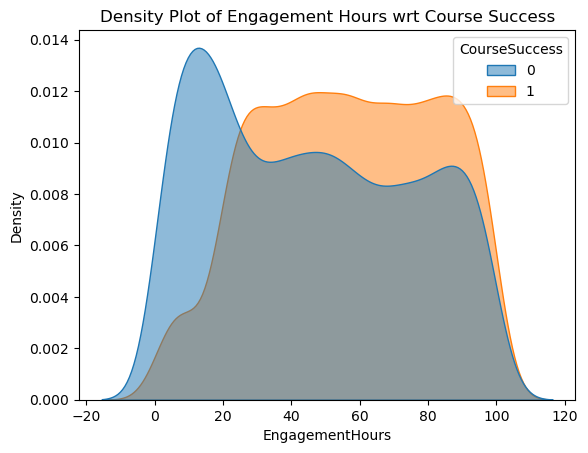

In [125]:
sns.kdeplot(data=df, x='EngagementHours', hue='CourseSuccess', fill=True, common_norm=False, alpha=0.5)
plt.title("Density Plot of Engagement Hours wrt Course Success")

## Inference
#### Very low Engagement hours may be the reason for failure in course, as suggested by the curve

Text(0.5, 1.0, 'Density Plot of Performance Metric wrt Course Success')

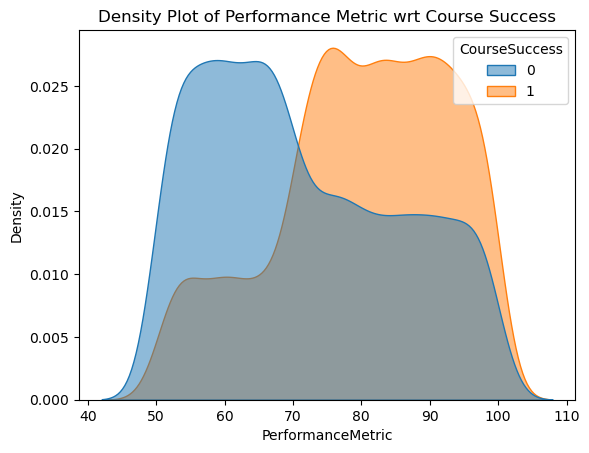

In [126]:
sns.kdeplot(data=df, x='PerformanceMetric', hue='CourseSuccess', fill=True, common_norm=False, alpha=0.5)
plt.title("Density Plot of Performance Metric wrt Course Success")

## Inference
#### People who have good performance metric are more likely to succeed in the course

Text(0.5, 1.0, 'Density Plot of Progress Percentage wrt Course Success')

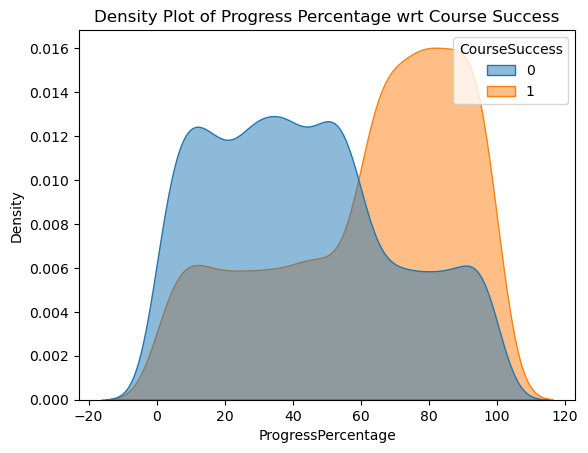

In [127]:
sns.kdeplot(data=df, x='ProgressPercentage', hue='CourseSuccess', fill=True, common_norm=False, alpha=0.5)
plt.title("Density Plot of Progress Percentage wrt Course Success")

## Inference
#### To achieve success, a high progress percentage is essential.

Text(0.5, 1.0, 'Count Plot of Course Success')

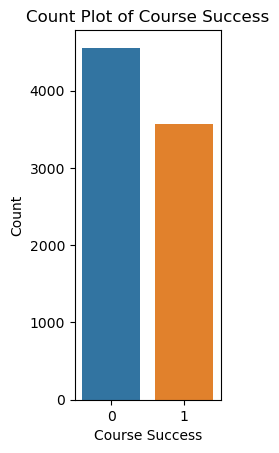

In [128]:
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='CourseSuccess')
plt.xlabel('Course Success')
plt.ylabel('Count')
plt.title("Count Plot of Course Success")

## Inference
#### A significant chunk is not completing the course.

Text(0.5, 1.0, 'Count Plot of Access Mode')

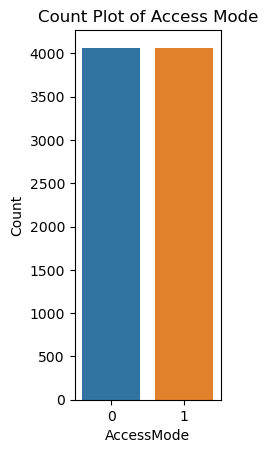

In [129]:
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='AccessMode')
plt.xlabel('AccessMode')
plt.ylabel('Count')
plt.title("Count Plot of Access Mode")

## Inference
#### Equitable distribution of access modes.

Text(0.5, 1.0, 'Count Plot of Assessments Taken')

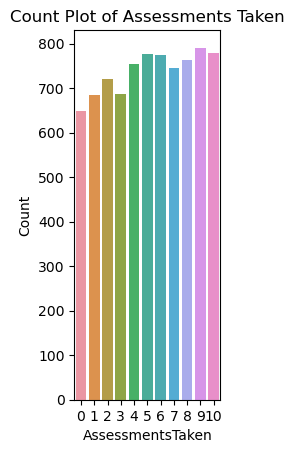

In [130]:
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='AssessmentsTaken')
plt.xlabel('AssessmentsTaken')
plt.ylabel('Count')
plt.title("Count Plot of Assessments Taken")

Text(0.5, 1.0, 'Count Plot of Pathway Type')

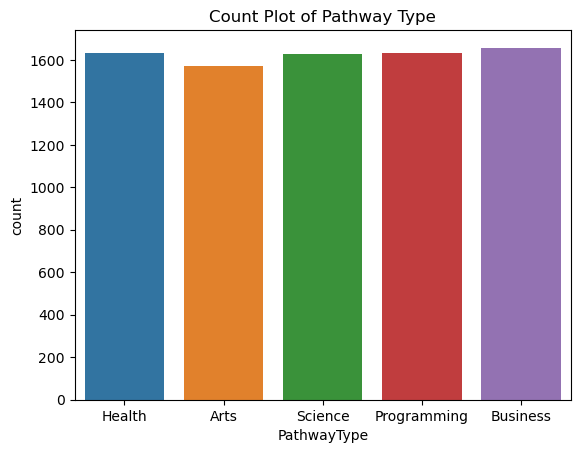

In [77]:
sns.countplot(data=df, x='PathwayType')
plt.title("Count Plot of Pathway Type")

## Inference
#### Almost uniform distribution

<h2 style="color: #4CAF50; font-size: 28px;">Correlation Matrix <a class="anchor" id="h25"></a></h2>

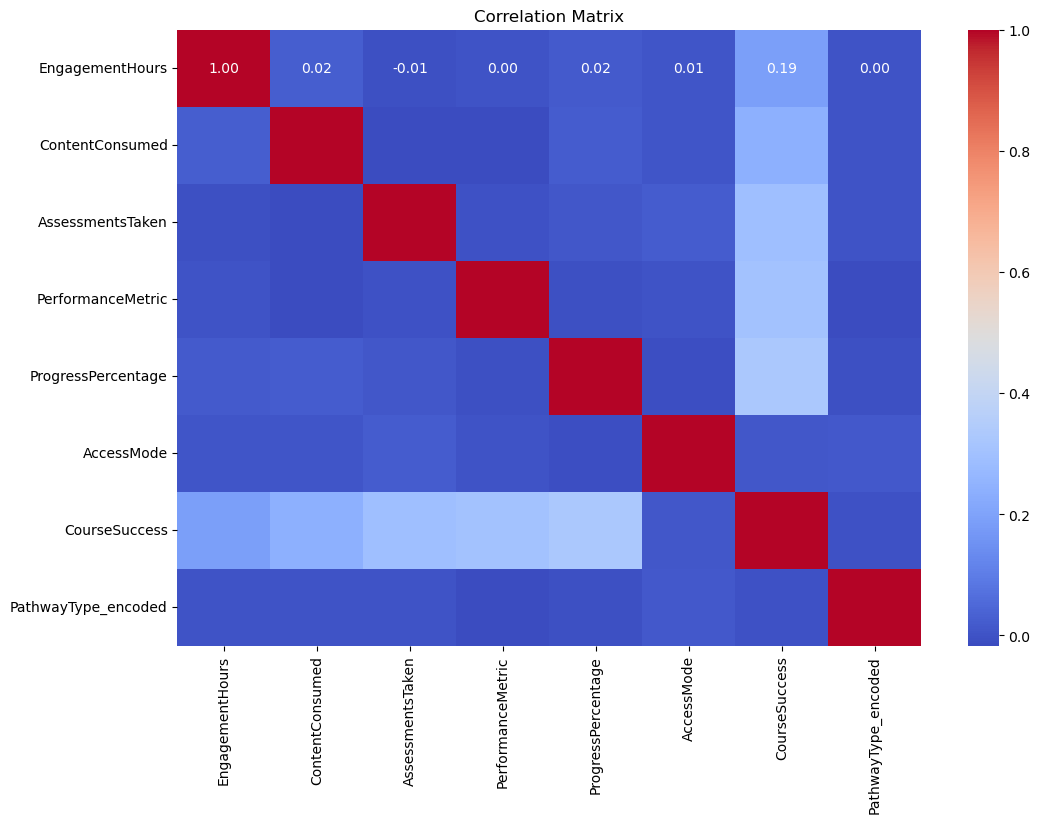

In [131]:
correlation_matrix = df.select_dtypes('number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Inference
#### None of the features are inter-correlated

<h2 style="color: #4CAF50; font-size: 28px;">ANOVA Analysis <a class="anchor" id="h26"></a></h2>

In [132]:
from scipy.stats import f_oneway
features = ['ContentConsumed', 'AssessmentsTaken', 'PerformanceMetric', 'ProgressPercentage', 'EngagementHours']
for feature in features:
    f_stat, p_val = f_oneway(df[df['CourseSuccess'] == 0][feature],
                            df[df['CourseSuccess'] == 1][feature])
    print(f"ANOVA for {feature} by Course Success: F-statistic={f_stat}, p-value={p_val}")

ANOVA for ContentConsumed by Course Success: F-statistic=494.0638362219313, p-value=2.6258140056348675e-106
ANOVA for AssessmentsTaken by Course Success: F-statistic=754.9899421518342, p-value=5.209327473415686e-159
ANOVA for PerformanceMetric by Course Success: F-statistic=831.1696082814552, p-value=4.239049326545993e-174
ANOVA for ProgressPercentage by Course Success: F-statistic=984.3742188383859, p-value=4.682238471623513e-204
ANOVA for EngagementHours by Course Success: F-statistic=292.31848379428055, p-value=2.0643401562540746e-64


## Inference
#### This suggests that these features are likely to be important predictors of CourseSuccess and that students' success in the course is associated with differences in these variables. Specifically, the higher F-statistics and extremely low p-values indicate strong evidence that these features are significantly different between the groups of successful and unsuccessful course completions.

<h2 style="color: #4CAF50; font-size: 28px;">Survival Analysis <a class="anchor" id="h27"></a></h2>

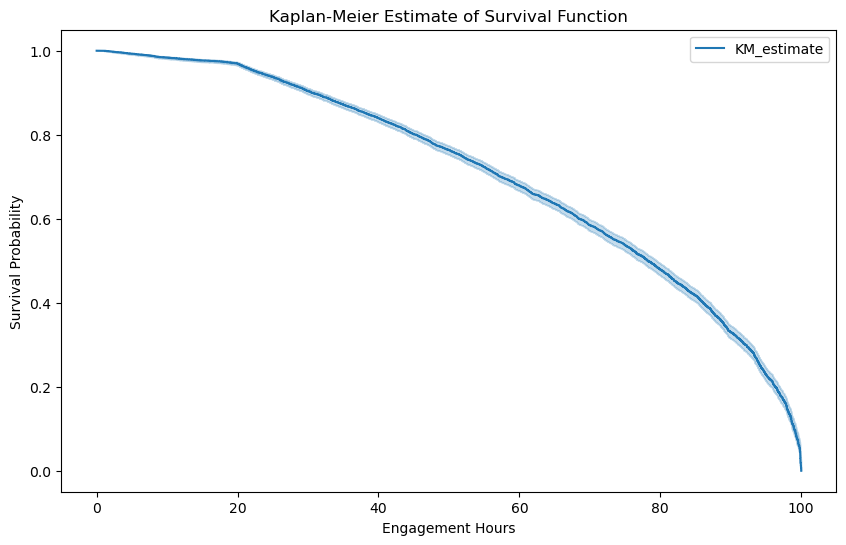

In [133]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
df['event'] = df['CourseSuccess']
df['duration'] = df['EngagementHours']
kmf.fit(durations=df['duration'], event_observed=df['event'])
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Estimate of Survival Function')
plt.xlabel('Engagement Hours')
plt.ylabel('Survival Probability')
plt.show()


## Inference
#### The survival probability curve shows that what is the probability of a student who succeeds in course to engage in the course.After Engagement Hours = 20, the curve starts getting steeper, the survival probability suddenly starts decreasing more abruptly.


<h2 style="color: #4CAF50; font-size: 28px;">Conditional Probability Heatmap <a class="anchor" id="h28"></a></h2>

In [134]:
c=[[0,0],[0,0]]
c[0][0]=max(df.loc[(df['CourseSuccess']==1) & (df['AccessMode']==1)].count())
c[0][1]=max(df.loc[(df['CourseSuccess']==1) & (df['AccessMode']==0)].count())
c[1][0]=max(df.loc[(df['CourseSuccess']==0) & (df['AccessMode']==1)].count())
c[1][1]=max(df.loc[(df['CourseSuccess']==0) & (df['AccessMode']==0)].count())
c[0][0]/=4065
c[1][0]/=4065
c[0][1]/=4058
c[1][1]/=4058
y=['Smartphone','Computer']
x=['Not Completed','Completed']
k=pd.DataFrame(c,columns = y, index = x) 
k.style.background_gradient(cmap ='plasma').set_properties(**{'font-size': '20px'})

,Smartphone,Computer
Not Completed,0.443542,0.434943
Completed,0.556458,0.565057


## Inference
#### There is almost  no effect of mode of accessing the course on course success.

In [135]:
x=df["PathwayType"].unique()
len(x)
p=label_encoder.classes_
y=df['CourseSuccess'].unique()
len(y)
q=['Not Completed','Completed']

In [136]:
arr=[[0,0,0,0,0],[0,0,0,0,0]]
for i in range(len(x)):
    for j in range(len(y)):
        arr[j][i]=max(df.loc[(df['PathwayType']==x[i]) & (df['CourseSuccess']==y[j])].count())
arr

[[943, 871, 919, 898, 924], [691, 699, 710, 735, 733]]

In [137]:
arr[0][0]/=1634
arr[1][0]/=1634
arr[0][1]/=1570
arr[1][1]/=1570
arr[0][2]/=1629
arr[1][2]/=1629
arr[0][3]/=1633
arr[1][3]/=1633
arr[0][4]/=1657
arr[1][4]/=1657


In [138]:
k=pd.DataFrame(arr,columns = p, index = q) 

k.style.background_gradient(cmap ='plasma').set_properties(**{'font-size': '20px'})

,Arts,Business,Health,Programming,Science
Not Completed,0.577111,0.554777,0.564150,0.549908,0.557634
Completed,0.422889,0.445223,0.435850,0.450092,0.442366


## Inference
#### There is no effect of pathway type on completion of course

<h2 style="color: #4CAF50; font-size: 28px;">Histogram Stack Plot <a class="anchor" id="h29"></a></h2>

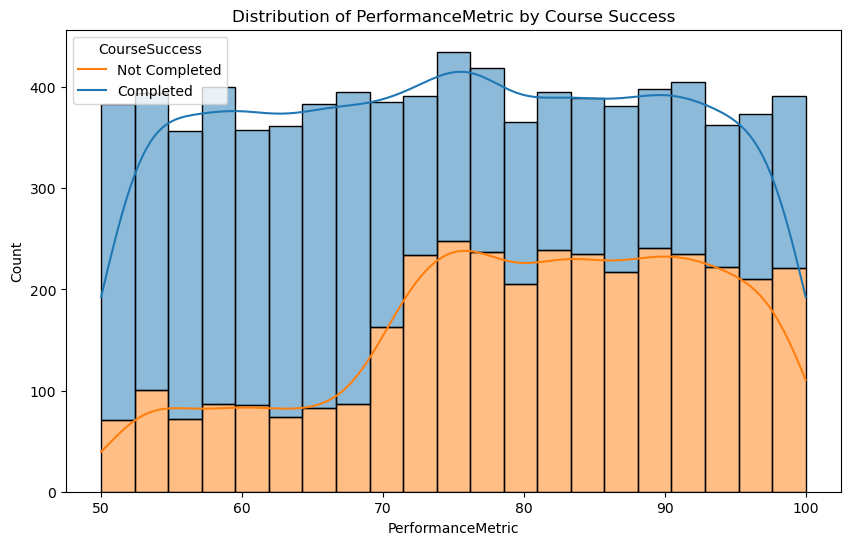

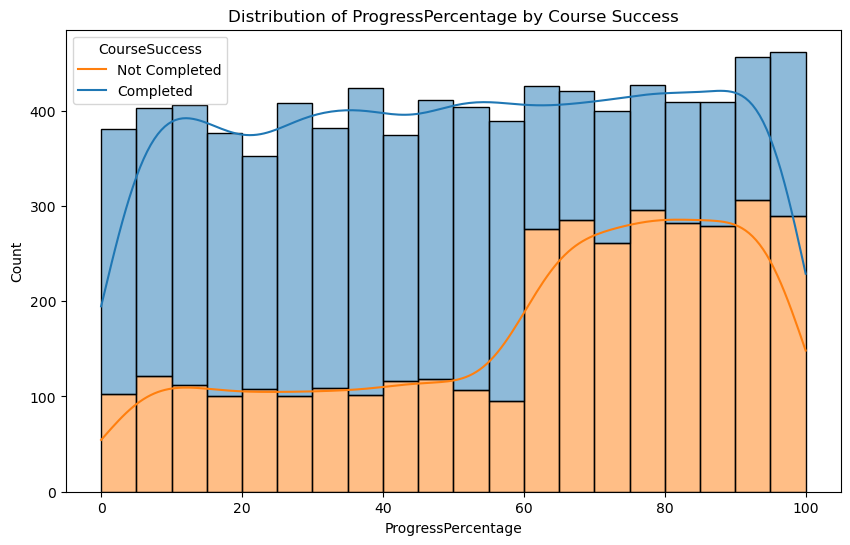

In [139]:
numerical_features = [ 'PerformanceMetric', 'ProgressPercentage']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    hist = sns.histplot(data=df, x=feature, hue='CourseSuccess', kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} by Course Success')
    plt.xlabel(feature)
    plt.ylabel('Count')
    

    # Manually setting labels for the legend
    plt.legend(labels=['Not Completed', 'Completed'], title='CourseSuccess')
    plt.show()

<h2 style="color: #4CAF50; font-size: 28px;">Joint Plots and Contour Plots <a class="anchor" id="h210"></a></h2>

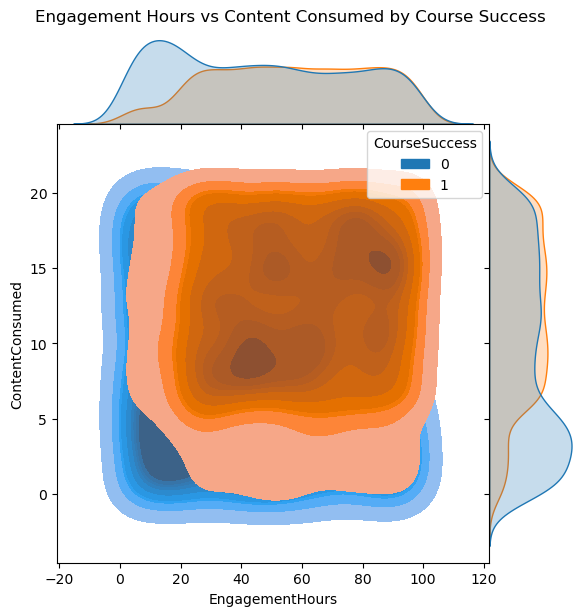

In [140]:
sns.jointplot(x='EngagementHours', y='ContentConsumed', data=df, kind='kde', fill=True, space=0, hue='CourseSuccess')
plt.suptitle('Engagement Hours vs Content Consumed by Course Success', y=1.02)
plt.show()

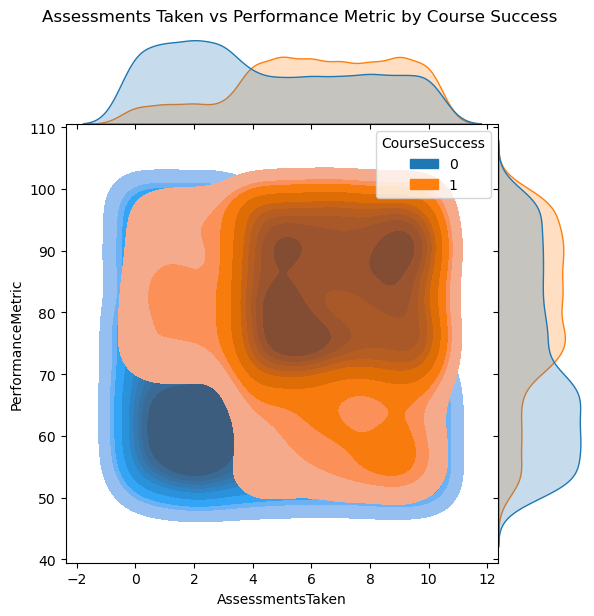

In [141]:
sns.jointplot(x='AssessmentsTaken', y='PerformanceMetric', data=df, kind='kde', fill=True, space=0, hue='CourseSuccess')
plt.suptitle('Assessments Taken vs Performance Metric by Course Success', y=1.02)
plt.show()

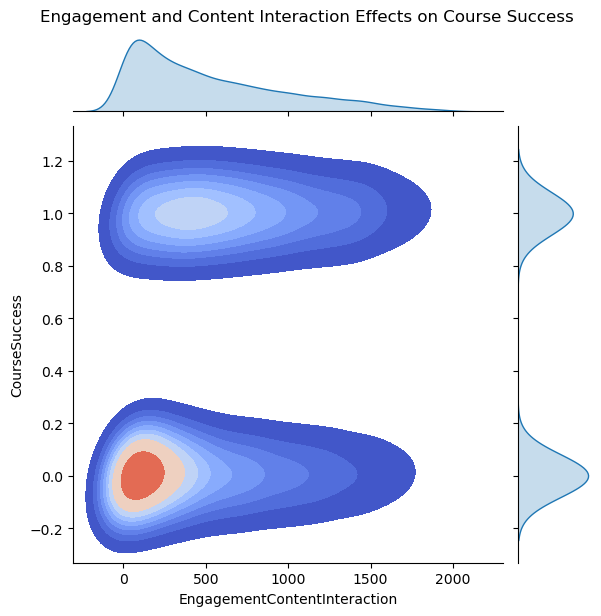

In [142]:
df['EngagementContentInteraction'] = df['EngagementHours'] * df['ContentConsumed']

# Joint plot for interaction effects
sns.jointplot(x='EngagementContentInteraction', y='CourseSuccess', data=df, kind='kde', fill=True, cmap='coolwarm')
plt.suptitle('Engagement and Content Interaction Effects on Course Success', y=1.02)
plt.show()

## Inference
#### The dark spots of graph with course success=1 show the bivariate thresholds are impactful in our analysis

<h2 style="color: #4CAF50; font-size: 28px;">Statistical Analysis of Assessments Taken by Pathway Type <a class="anchor" id="h211"></a></h2>

In [143]:
assessments_stats_by_pathway = df.groupby('PathwayType')['AssessmentsTaken'].agg(['max', 'mean','std'])
mode_assessments_by_pathway = df.groupby('PathwayType')['AssessmentsTaken'].agg(lambda x: x.mode().iloc[0])

print("Maximum Assessments Taken by PathwayType:")
print(assessments_stats_by_pathway)
print("Mode of Assessments Taken by PathwayType:")
mode_assessments_by_pathway

Maximum Assessments Taken by PathwayType:
             max      mean       std
PathwayType                         
Arts          10  5.110828  3.101298
Business      10  5.202776  3.086306
Health        10  5.199510  3.191669
Programming   10  5.157991  3.136522
Science       10  5.160835  3.146101
Mode of Assessments Taken by PathwayType:


PathwayType
Arts            8
Business        6
Health         10
Programming     4
Science         5
Name: AssessmentsTaken, dtype: int64

## Inference
#### The mode of Health sector and Arts Sector shows the dedication towards the course.

<h2 style="color: #4CAF50; font-size: 28px;">Inference of Engagement Hours by Access Mode <a class="anchor" id="h212"></a></h2>

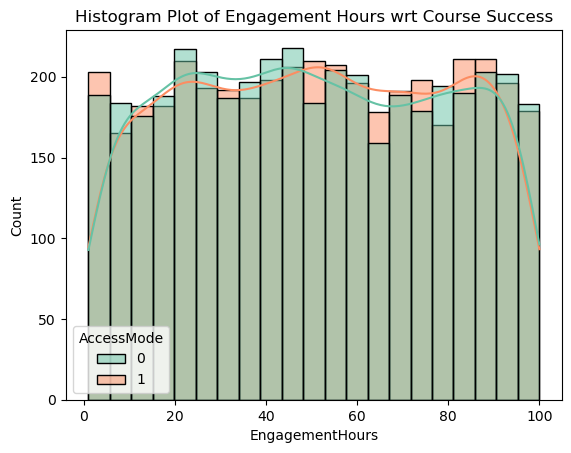

In [144]:
sns.histplot(df, x='EngagementHours', hue='AccessMode', palette="Set2",kde=True)
plt.title("Histogram Plot of Engagement Hours wrt Course Success")
plt.show()


## Inference
#### - People who have short courses are using Laptop.
#### - People who have moderate courses are using Smartphone.
#### - People who have very long course are using Laptop.

<h2 style="color: #4CAF50; font-size: 28px;">Threshold of Success using Random Forest <a class="anchor" id="h213"></a></h2>

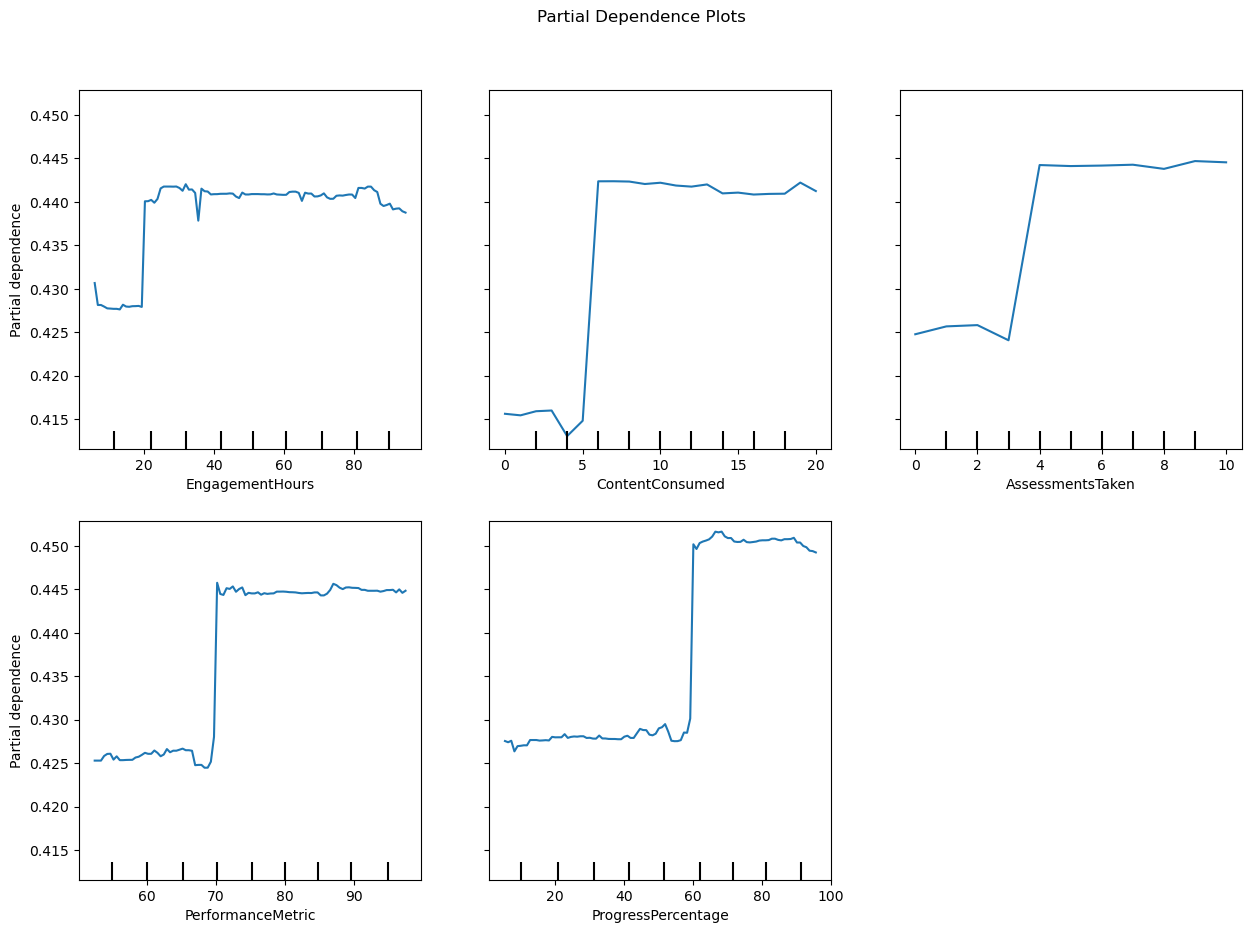

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay

X = df.drop(columns=['CourseSuccess'])
y = df['CourseSuccess']
le =  LabelEncoder()
X['PathwayType'] = le.fit_transform(X['PathwayType'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

features_to_plot = ['EngagementHours', 'ContentConsumed', 'AssessmentsTaken', 'PerformanceMetric', 'ProgressPercentage']

fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(clf, X_train, features=features_to_plot, feature_names=X.columns, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

## Inference
#### We check here the partial dependence plots keeping only one feature variable and others fixed using random forest, we found that all of the data gets divided by a threshold, the thresholds for each feature is: 
#### - EngagementHours: 20
#### - ContentConsumed: 5
#### - AssessmentsTaken: 4
#### - PerformanceMetric: 70
#### - ProgressPercentage: 60

<div style="text-align: center; font-size: 42px;">
Feature Engineering <a class="anchor" id="h3"></a>
</div>


<h2 style="color: #4CAF50; font-size: 28px;">Feature Importance using \(\eta^2\) <a class="anchor" id="h31"></a></h2>


In [146]:
cols =['ContentConsumed','AssessmentsTaken','PerformanceMetric','ProgressPercentage','AccessMode','EngagementHours']

def eta_squared(data, cat_col, cont_col):
    categories = data[cat_col].unique()
    overall_mean = data[cont_col].mean()
    ss_total = np.sum((data[cont_col] - overall_mean) ** 2)
    
    ss_between = sum([len(data[data[cat_col] == cat]) * 
                      (data[data[cat_col] == cat][cont_col].mean() - overall_mean) ** 2
                      for cat in categories])
    
    return ss_between / ss_total
for col in cols:
    eta_squared_value = eta_squared(df, 'CourseSuccess', col)
    print(f'Eta Squared of {col}: {eta_squared_value}')

Eta Squared of ContentConsumed: 0.0573488305617245
Eta Squared of AssessmentsTaken: 0.08505980145002279
Eta Squared of PerformanceMetric: 0.09284560555159264
Eta Squared of ProgressPercentage: 0.10810914468532051
Eta Squared of AccessMode: 7.505277203395219e-05
Eta Squared of EngagementHours: 0.03474473055517198


## Inference
#### Progress Percentage is the most significant factor.

<h2 style="color: #4CAF50; font-size: 28px;">Feature generation using interaction method and checking their relevance using \(\eta^2\) <a class="anchor" id="h32"></a></h2>


In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['PathwayType'] = le.fit_transform(df['PathwayType'])


features = ['ContentConsumed', 'AssessmentsTaken', 'PerformanceMetric', 'ProgressPercentage', 'EngagementHours']


interaction_feature_names = []
for i in range(len(features)):
    for j in range(i+1,len(features)):
        if i != j:
            feature1 = features[i]
            feature2 = features[j]
            interaction_feature_name = f'{feature1}*{feature2}'
            df[interaction_feature_name] = df[feature1]*df[feature2]  # Replace 0 with NaN to avoid division by zero
            
            # Handle infinity values
            df[interaction_feature_name].replace([np.inf, -np.inf], 0, inplace=True)
            
            interaction_feature_names.append(interaction_feature_name)

all_feature_names = features + interaction_feature_names


for col in interaction_feature_names:
    eta_squared_value = eta_squared(df, 'CourseSuccess', col)
    print(f'Eta Squared of {col}: {eta_squared_value}')

Eta Squared of ContentConsumed*AssessmentsTaken: 0.13866336064821252
Eta Squared of ContentConsumed*PerformanceMetric: 0.10863218212966631
Eta Squared of ContentConsumed*ProgressPercentage: 0.13901639476875788
Eta Squared of ContentConsumed*EngagementHours: 0.08582551727359371
Eta Squared of AssessmentsTaken*PerformanceMetric: 0.1420677956309834
Eta Squared of AssessmentsTaken*ProgressPercentage: 0.1691187697838439
Eta Squared of AssessmentsTaken*EngagementHours: 0.1175753909644308
Eta Squared of PerformanceMetric*ProgressPercentage: 0.16530728473277825
Eta Squared of PerformanceMetric*EngagementHours: 0.07809745936934351
Eta Squared of ProgressPercentage*EngagementHours: 0.12066367547765089


<h2 style="color: #4CAF50; font-size: 28px;"> Feature generation using square root method and checking relevance using \(\eta^2\) <a class="anchor" id="h33"></a></h2>

In [148]:
features = ['ContentConsumed', 'AssessmentsTaken', 'PerformanceMetric', 'ProgressPercentage', 'EngagementHours']
for col in features:
    df[f'{col}3']=np.sqrt(df[col])
k= ['ContentConsumed3', 'AssessmentsTaken3', 'PerformanceMetric3', 'ProgressPercentage3', 'EngagementHours3']
for col in k:
    eta_squared_value = eta_squared(df, 'CourseSuccess', col)
    print(f'Eta Squared of {col}: {eta_squared_value}')

Eta Squared of ContentConsumed3: 0.0661004600460638
Eta Squared of AssessmentsTaken3: 0.08775989897673435
Eta Squared of PerformanceMetric3: 0.09469128811096326
Eta Squared of ProgressPercentage3: 0.09217205314678137
Eta Squared of EngagementHours3: 0.04365802599190026


<h2 style="color: #4CAF50; font-size: 28px;"> Feature generation using squaring method and checking relevance using \(\eta^2\) <a class="anchor" id="h34"></a></h2>

In [149]:
features = ['ContentConsumed', 'AssessmentsTaken', 'PerformanceMetric', 'ProgressPercentage', 'EngagementHours']
for col in features:
    df[f'{col}2']=np.square(df[col])
k= ['ContentConsumed2', 'AssessmentsTaken2', 'PerformanceMetric2', 'ProgressPercentage2', 'EngagementHours2']
for col in k:
    eta_squared_value = eta_squared(df, 'CourseSuccess', col)
    print(f'Eta Squared of {col}: {eta_squared_value}')

Eta Squared of ContentConsumed2: 0.03742609702544362
Eta Squared of AssessmentsTaken2: 0.06125540727044585
Eta Squared of PerformanceMetric2: 0.08781832035046634
Eta Squared of ProgressPercentage2: 0.11460360302205172
Eta Squared of EngagementHours2: 0.021225346983504454


<h2 style="color: #4CAF50; font-size: 28px;"> Feature generation using cubing method and checking relevance using \(\eta^2\) <a class="anchor" id="h35"></a></h2>

In [150]:
features = ['ContentConsumed', 'AssessmentsTaken', 'PerformanceMetric', 'ProgressPercentage', 'EngagementHours']
for col in features:
    df[f'{col}4']=np.square(df[col])*df[col]
k= ['ContentConsumed4', 'AssessmentsTaken4', 'PerformanceMetric4', 'ProgressPercentage4', 'EngagementHours4']
for col in k:
    eta_squared_value = eta_squared(df, 'CourseSuccess', col)
    print(f'Eta Squared of {col}: {eta_squared_value}')

Eta Squared of ContentConsumed4: 0.02566029435400048
Eta Squared of AssessmentsTaken4: 0.04365444228730036
Eta Squared of PerformanceMetric4: 0.0815151124300993
Eta Squared of ProgressPercentage4: 0.10630619368360053
Eta Squared of EngagementHours4: 0.014121613283019212


## Inference
#### It turns out that cubing has no benefit in our feature generation 

<h2 style="color: #4CAF50; font-size: 28px;"> Feature Selection <a class="anchor" id="h36"></a></h2>

<p style='text-align: center'>\(\eta^2\) of Transformed Features</p>
<table>
  <tr>
    <th></th>
    <th>No Transformation</th>
    <th>Square Root</th>
    <th>Squared</th>
    <th>Cubed</th>
  </tr>
  <tr>
    <td>ContentConsumed</td>
    <td>0.0573</td>
    <td style="font-weight: bold;">0.0661</td>
    <td>0.0374</td>
    <td>0.0256</td>
  </tr>
  <tr>
    <td>AssessmentsTaken</td>
    <td>0.0851</td>
    <td style="font-weight: bold;">0.0877</td>
    <td>0.0612</td>
    <td>0.0815</td>
  </tr>
  <tr>
    <td>ProgressPercentage</td>
    <td>0.1081</td>
    <td>0.0922</td>
    <td style="font-weight: bold;">0.1146</td>
    <td>0.1063</td>
  </tr>
  <tr>
    <td>PerformanceMetric</td>
    <td>0.0928</td>
    <td style="font-weight: bold;">0.0947</td>
    <td>0.0878</td>
    <td>0.0815</td>
  </tr>
  <tr>
    <td>EngagementHours</td>
    <td>0.0347</td>
    <td style="font-weight: bold;">0.0436</td>
    <td>0.0212</td>
    <td>0.0141</td>
  </tr>
</table>


In [151]:
df.rename(columns={'ContentConsumed*AssessmentsTaken':'InvolvementMetric','AssessmentsTaken*PerformanceMetric':'ExamProficiencyIndex','AssessmentsTaken*ProgressPercentage':'EngagementIndex','PerformanceMetric*ProgressPercentage':'AcademicAchievementFactor','ProgressPercentage*EngagementHours':'StudyDedicationIndex'},inplace=True)
Ndf=df[['ContentConsumed3','AssessmentsTaken','PerformanceMetric','ProgressPercentage2','EngagementHours3','InvolvementMetric','ExamProficiencyIndex','EngagementIndex','AcademicAchievementFactor','StudyDedicationIndex']]

In [153]:
Ndf.loc[:, 'PathwayType'] = df['PathwayType_encoded']

In [154]:
Ndf

,ContentConsumed3,AssessmentsTaken,PerformanceMetric,ProgressPercentage2,EngagementHours3,InvolvementMetric,ExamProficiencyIndex,EngagementIndex,AcademicAchievementFactor,StudyDedicationIndex,PathwayType
0,4.123106,3,50.365656,435.171838,5.475374,51,151.096968,62.582318,1050.666501,625.400111,2
1,1.000000,5,62.615970,4307.613931,5.272821,5,313.079849,328.162076,4109.637330,1824.754381,0
2,3.741657,2,78.458962,4071.972185,9.317751,28,156.917925,127.624013,5006.623826,5540.189341,0
3,4.123106,10,59.198853,9107.488389,5.919327,170,591.988527,954.331619,5649.533697,3343.827842,4
4,4.000000,0,98.428285,327.699693,9.617206,0,0.000000,0.000000,1781.795817,1674.309858,3
...,...,...,...,...,...,...,...,...,...,...,...
8995,3.741657,4,54.469359,1088.386579,6.119250,56,217.877434,131.962818,1796.982507,1235.344364,2
8996,2.645751,7,59.413257,0.064834,6.973625,49,415.892802,1.782376,15.128106,12.382786,4
8997,1.732051,3,69.508297,4926.377618,6.181627,9,208.524892,210.564476,4878.659395,2682.065822,2
8998,3.605551,10,79.655182,5325.383495,8.369508,130,796.551825,729.752252,5812.854882,5111.817138,2


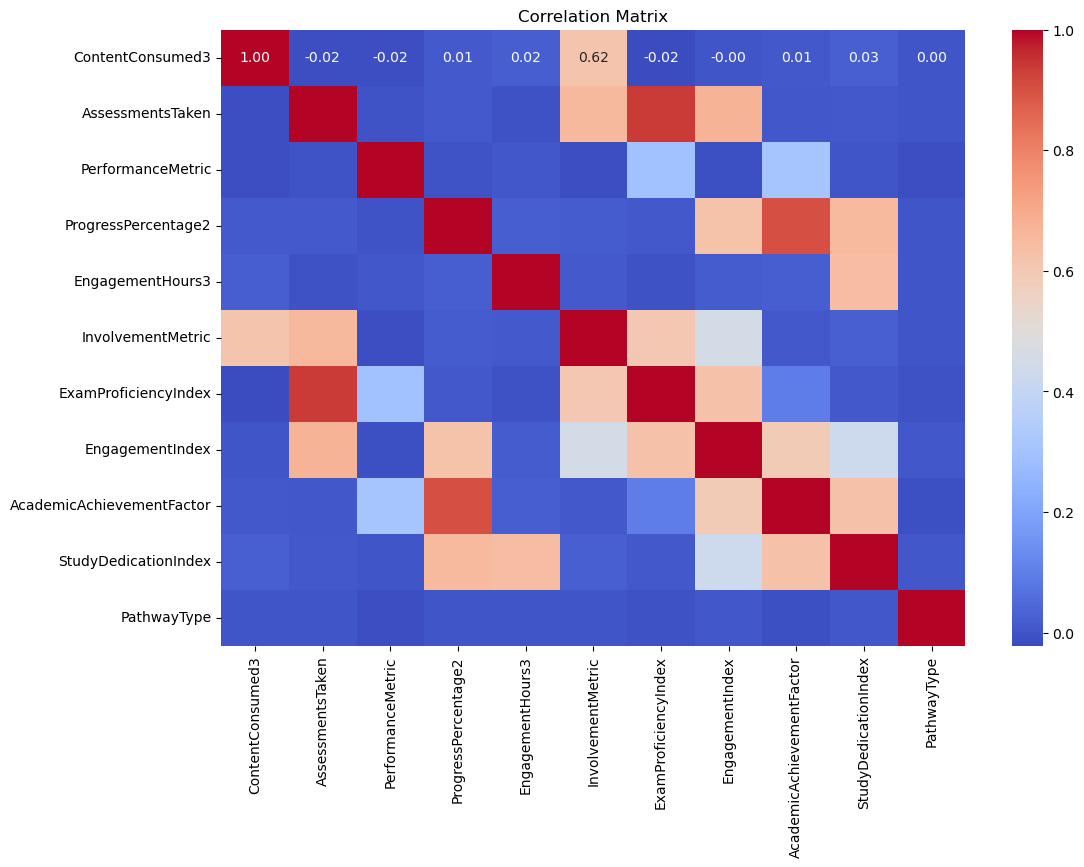

In [155]:
correlation_matrix = Ndf.select_dtypes('number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Lets drop one of 0.94 and 0.9

In [156]:
Ndf.drop(columns=['ExamProficiencyIndex','AcademicAchievementFactor'],inplace=True)

C:\Users\91934\AppData\Local\Temp\ipykernel_41828\2958091703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ndf.drop(columns=['ExamProficiencyIndex','AcademicAchievementFactor'],inplace=True)


In [157]:
Ndf.loc[:,'CourseSuccess'] = df['CourseSuccess']

C:\Users\91934\AppData\Local\Temp\ipykernel_41828\3530454770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ndf.loc[:,'CourseSuccess'] = df['CourseSuccess']


In [158]:
Ndf

,ContentConsumed3,AssessmentsTaken,PerformanceMetric,ProgressPercentage2,EngagementHours3,InvolvementMetric,EngagementIndex,StudyDedicationIndex,PathwayType,CourseSuccess
0,4.123106,3,50.365656,435.171838,5.475374,51,62.582318,625.400111,2,0
1,1.000000,5,62.615970,4307.613931,5.272821,5,328.162076,1824.754381,0,0
2,3.741657,2,78.458962,4071.972185,9.317751,28,127.624013,5540.189341,0,1
3,4.123106,10,59.198853,9107.488389,5.919327,170,954.331619,3343.827842,4,1
4,4.000000,0,98.428285,327.699693,9.617206,0,0.000000,1674.309858,3,0
...,...,...,...,...,...,...,...,...,...,...
8995,3.741657,4,54.469359,1088.386579,6.119250,56,131.962818,1235.344364,2,0
8996,2.645751,7,59.413257,0.064834,6.973625,49,1.782376,12.382786,4,0
8997,1.732051,3,69.508297,4926.377618,6.181627,9,210.564476,2682.065822,2,0
8998,3.605551,10,79.655182,5325.383495,8.369508,130,729.752252,5111.817138,2,1


<h2 style="color: #4CAF50; font-size: 28px;">Feature Transformation <a class="anchor" id="h37"></a></h2>

### Why we have done MinMax: Data is not Normalised, and without normalization, the data values have different ranges, which can lead to biased results in machine learning models. By using MinMax scaling, we transformed the data to fit within a specific range, typically [0, 1].

In [159]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = Ndf.columns.difference(['CourseSuccess'])

scaler = MinMaxScaler()
Ndf[columns_to_scale] = scaler.fit_transform(Ndf[columns_to_scale])

C:\Users\91934\AppData\Local\Temp\ipykernel_41828\1520139606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ndf[columns_to_scale] = scaler.fit_transform(Ndf[columns_to_scale])


In [160]:
Ndf

,ContentConsumed3,AssessmentsTaken,PerformanceMetric,ProgressPercentage2,EngagementHours3,InvolvementMetric,EngagementIndex,StudyDedicationIndex,PathwayType,CourseSuccess
0,0.921954,0.3,0.007212,0.043535,0.497138,0.255,0.062776,0.062719,0.50,0
1,0.223607,0.5,0.252268,0.430936,0.474625,0.025,0.329179,0.183058,0.00,0
2,0.836660,0.2,0.569192,0.407362,0.924211,0.140,0.128019,0.555848,0.00,1
3,0.921954,1.0,0.183912,0.911119,0.546483,0.850,0.957288,0.335475,1.00,1
4,0.894427,0.0,0.968660,0.032783,0.957495,0.000,0.000000,0.167963,0.75,0
...,...,...,...,...,...,...,...,...,...,...
8995,0.836660,0.4,0.089303,0.108883,0.568704,0.280,0.132372,0.123919,0.50,0
8996,0.591608,0.7,0.188201,0.000006,0.663666,0.245,0.001788,0.001212,1.00,0
8997,0.387298,0.3,0.390143,0.492838,0.575637,0.045,0.211217,0.269076,0.50,0
8998,0.806226,1.0,0.593121,0.532755,0.818816,0.650,0.732013,0.512867,0.50,1


<div style="text-align: center; font-size: 42px;">
Model training on Threshold Analysis <a class="anchor" id="h4"></a>
</div>


Accuracy: 0.9383333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2156
           1       0.96      0.88      0.92      1444

    accuracy                           0.94      3600
   macro avg       0.94      0.93      0.93      3600
weighted avg       0.94      0.94      0.94      3600



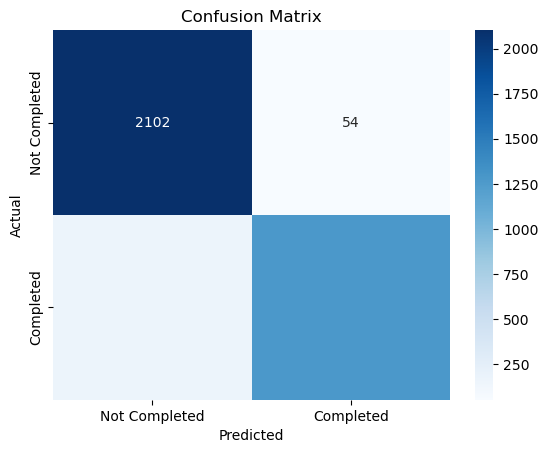

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_binary = pd.read_csv('vidya_vigyan_data.csv')

df_binary['EngagementHours'] = df_binary['EngagementHours'].apply(lambda x: 0 if x < 20 else 1)
df_binary['ContentConsumed'] = df_binary['ContentConsumed'].apply(lambda x: 0 if x < 7 else 1)
df_binary['AssessmentsTaken'] = df_binary['AssessmentsTaken'].apply(lambda x: 0 if x < 4 else 1)
df_binary['PerformanceMetric'] = df_binary['PerformanceMetric'].apply(lambda x: 0 if x < 70 else 1)
df_binary['ProgressPercentage'] = df_binary['ProgressPercentage'].apply(lambda x: 0 if x < 60 else 1)

le =  LabelEncoder()
df_binary['PathwayType'] = le.fit_transform(df_binary['PathwayType'])

X_binary = df_binary.drop(columns =['LearnerId','CourseSuccess','AccessMode'], axis=1)  # Features
y = df_binary['CourseSuccess']  # Target

X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_binary, y, test_size=0.4, random_state=42)

BNB = BernoulliNB()
BNB.fit(X_train_bin, y_train)

y_pred_bnb = BNB.predict(X_test_bin)

accuracy = accuracy_score(y_test, y_pred_bnb)
report = classification_report(y_test, y_pred_bnb)
conf_matrix = confusion_matrix(y_test, y_pred_bnb)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Completed", "Completed"], yticklabels=["Not Completed", "Completed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### In this, we have used threshold to split and categorize the continuous variable into binary variable, and used Bernoulli Naive Bayes model for the newly created binary features and thereby, predict the target variable, giving an accuracy of 0.9383


<div style="text-align: center; font-size: 42px;">
Model training on Modified Dataframe <a class="anchor" id="h5"></a>
</div>


<h2 style="color: #4CAF50; font-size: 28px;">Test Train Split <a class="anchor" id="h51"></a></h2>

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Ndf.drop('CourseSuccess', axis=1), Ndf['CourseSuccess'], test_size=0.2, random_state=42)

<h2 style="color: #4CAF50; font-size: 28px;">Logistic Regression <a class="anchor" id="h52"></a></h2>

Accuracy: 0.81
Confusion Matrix:
 [[757 137]
 [176 555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       894
           1       0.80      0.76      0.78       731

    accuracy                           0.81      1625
   macro avg       0.81      0.80      0.80      1625
weighted avg       0.81      0.81      0.81      1625



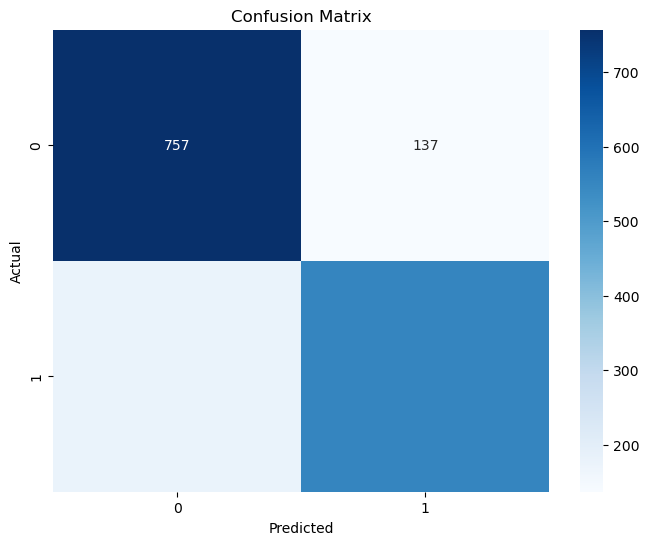

In [163]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2 style="color: #4CAF50; font-size: 28px;">Decision Tree <a class="anchor" id="h53"></a></h2>

Accuracy: 0.91
Confusion Matrix:
 [[822  72]
 [ 75 656]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       894
           1       0.90      0.90      0.90       731

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



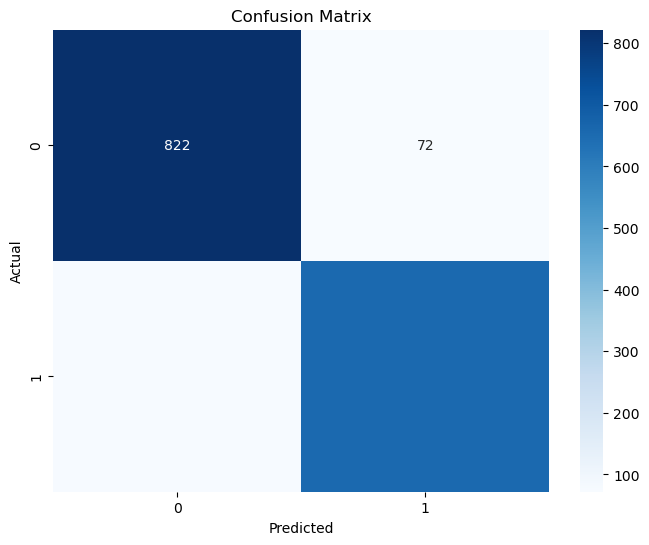

In [164]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred =dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h2 style="color: #4CAF50; font-size: 28px;">Random Forest <a class="anchor" id="h54"></a></h2>

Accuracy: 0.96
Confusion Matrix:
 [[874  20]
 [ 47 684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



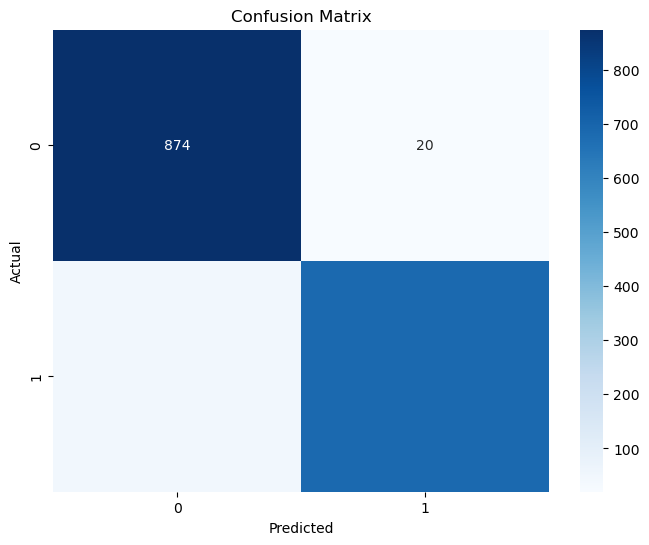

In [165]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Inference
#### Excellent Accuracy due to less variation in data which fits perfectly on Stochastic arrangements.

<h2 style="color: #4CAF50; font-size: 28px;">SVM <a class="anchor" id="h55"></a></h2>

Accuracy: 0.88
Confusion Matrix:
 [[817  77]
 [123 608]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       894
           1       0.89      0.83      0.86       731

    accuracy                           0.88      1625
   macro avg       0.88      0.87      0.87      1625
weighted avg       0.88      0.88      0.88      1625



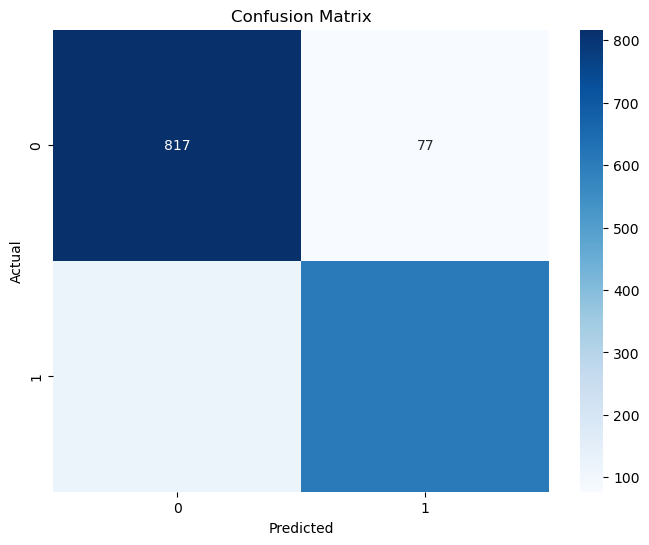

In [166]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Inference
#### We have analysed tSNE and that was awful which explains bad accuracy of SVM.

<h2 style="color: #4CAF50; font-size: 28px;">XGBoost <a class="anchor" id="h56"></a></h2>

c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:07:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.96
Confusion Matrix:
 [[873  21]
 [ 49 682]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.93      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625



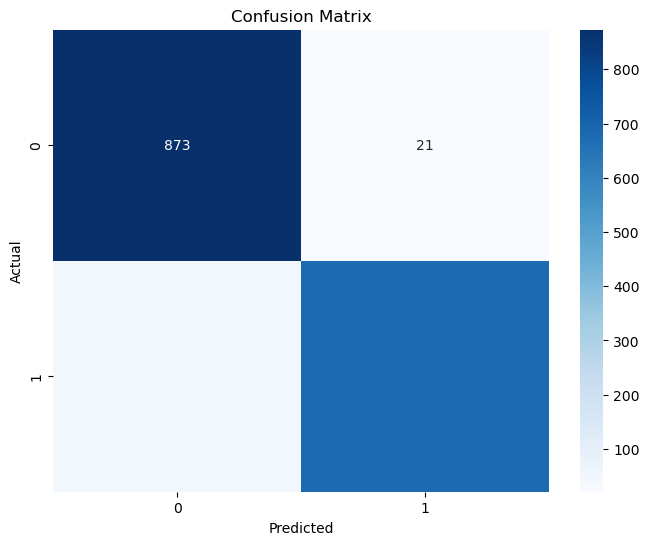

In [167]:
import xgboost as xgb

xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xg.fit(X_train, y_train)

y_pred =xg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Inference
#### Excellent accuracy

<h2 style="color: #4CAF50; font-size: 28px;">Gaussian Naive Bayes <a class="anchor" id="h57"></a></h2>

Accuracy: 0.77
Confusion Matrix:
 [[746 148]
 [225 506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       894
           1       0.77      0.69      0.73       731

    accuracy                           0.77      1625
   macro avg       0.77      0.76      0.77      1625
weighted avg       0.77      0.77      0.77      1625



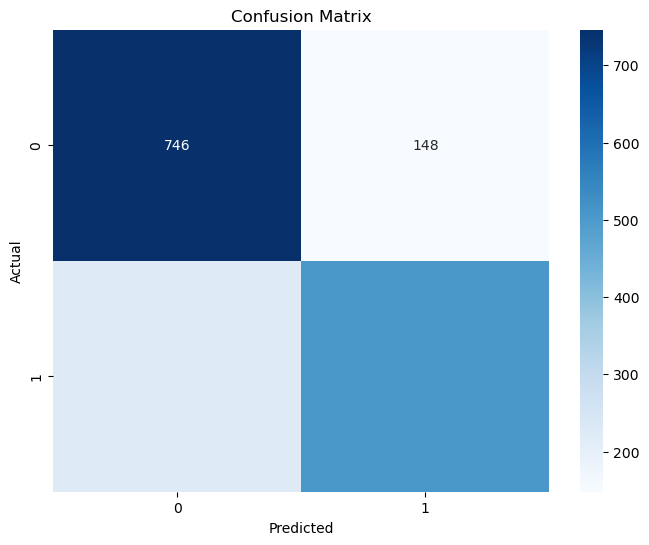

In [168]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Data is not normally distributed, so the Gaussian Naive Bayes which aims to fit data on Normal distribution is performing poorly.

<h2 style="color: #4CAF50; font-size: 28px;">Artificial Neural Network <a class="anchor" id="h58"></a></h2>

c:\Users\91934\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6706 - loss: 0.6284 - val_accuracy: 0.7977 - val_loss: 0.4391
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8118 - loss: 0.4273 - val_accuracy: 0.8369 - val_loss: 0.3761
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.3828 - val_accuracy: 0.8415 - val_loss: 0.3677
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3683 - val_accuracy: 0.8415 - val_loss: 0.3623
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.3685 - val_accuracy: 0.8554 - val_loss: 0.3546
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3466 - val_accuracy: 0.8508 - val_loss: 0.3506
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.3456 - val_accuracy: 0.8454 - val_loss: 0.3611
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3525 - val_accu

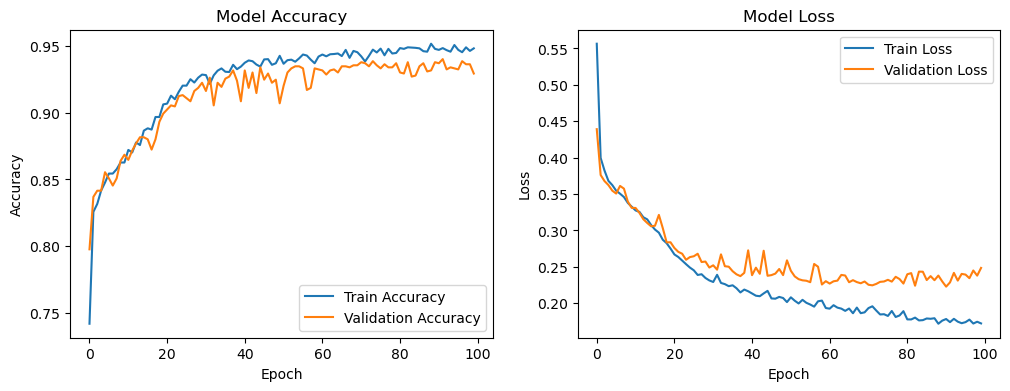

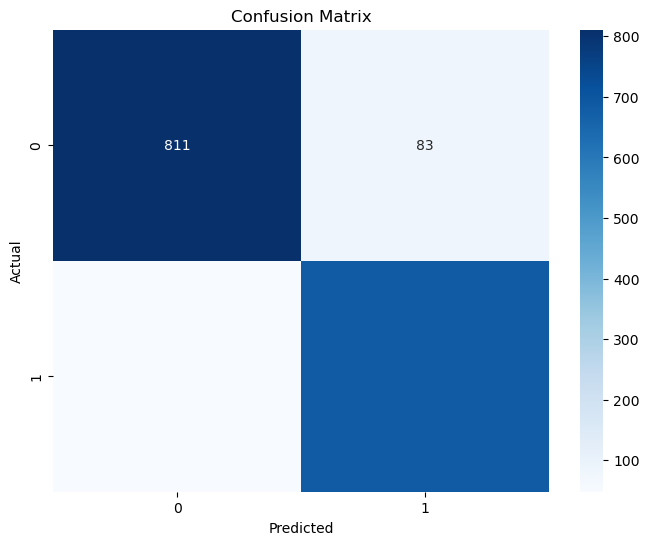

In [169]:
from tensorflow import keras
from tensorflow.keras import layers

nnmodel = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(8, activation='relu'),   # Fourth hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

nnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nnmodel.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob = nnmodel.predict(X_test)
y_pred = (y_pred_prob >0.37).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Inference
#### We have tried many architechtures and thresholds and this neural network turned out to be one of the best combination. Architechture may be optimised more

<div style="text-align: center; font-size: 42px;">
Ensemble Methods <a class="anchor" id="h6"></a>
</div>


### We will be using XGBoost, Random Forest and Decision Tree Classifier because they have good accuracy

<h2 style="color: #4CAF50; font-size: 28px;">Voting Classifier <a class="anchor" id="h61"></a></h2>

In [170]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('dt', dtc),
        ('rf', rf),
        ('xgb', xg),],
    voting='soft'  
)

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9569230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.93      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625



c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<h2 style="color: #4CAF50; font-size: 28px;">Stacking <a class="anchor" id="h62"></a></h2>

In [171]:
from sklearn.ensemble import StackingClassifier

base_models = [ ('xgboost', xg),
    ('dt', dtc),
    ('rf', rf)
]

meta_model =LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

y_pred1 = stacking_model.predict(X_test)
y_pred_p=stacking_model.predict_proba(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")

c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91934\anaconda3\Lib\site-packages\

Accuracy: 0.9593846153846154


## Inference
#### We will be choosing it as final model even it has slightly less accuracy than Random Forest and XGBoost because it has tendency to learn from other models and metamodel covers and additively use the other models.

<h2 style="color: #4CAF50; font-size: 28px;">Bagging <a class="anchor" id="h63"></a></h2>

In [172]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator=xg, n_estimators=50, random_state=42)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91934\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91934\anaconda3\Lib\site-packages\

Accuracy: 0.9587692307692308


<div style="text-align: center; font-size: 42px;">
Evaluation on Stacking Model <a class="anchor" id="h7"></a>
</div>


<h2 style="color: #4CAF50; font-size: 28px;">Confusion Matrix <a class="anchor" id="h71"></a></h2>

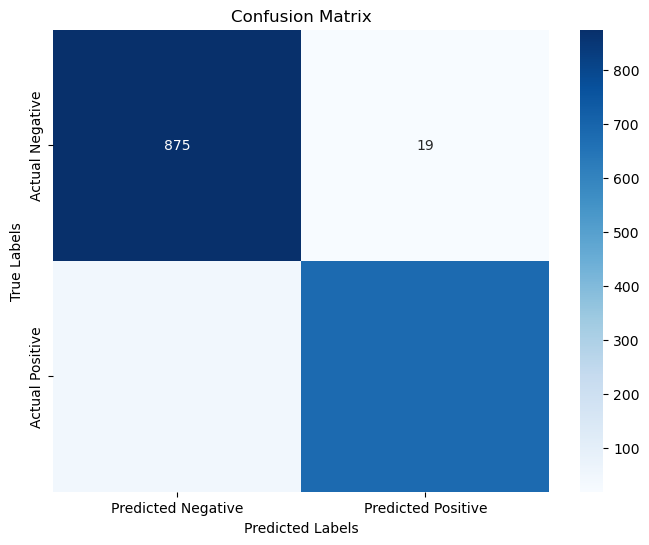

In [173]:

cm = confusion_matrix(y_test,y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<h2 style="color: #4CAF50; font-size: 28px;">Other Metrics <a class="anchor" id="h72"></a></h2>

In [174]:
from sklearn.metrics import f1_score, accuracy_score

f1 = f1_score(y_test,y_pred1)
accuracy = accuracy_score(y_test,y_pred1)

print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

F1 Score: 0.95
Accuracy: 0.96


In [175]:
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



<div style="text-align: center; padding: 20px; border: 2px solid #4CAF50; border-radius: 10px; background-color: #ffffff; box-shadow: 0 4px 20px rgba(0, 0, 0, 0.1);">
        <h1 style="color: #4CAF50;">Thank You!</h1>
</div>